In [25]:
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from PIL import Image
import torch.nn as nn
import torchvision.models as models
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

from main import *

In [10]:
resnet_avgpool_labels_train = np.load('res-net/avgpool_labels_train.npy')
resnet_avgpool_features_train = np.load('res-net/avgpool_features_train.npy')
resnet_avgpool_features_val = np.load('res-net/avgpool_features_val.npy')
resnet_avgpool_labels_val = np.load('res-net/avgpool_labels_val.npy')

inception_avgpool_labels_train = np.load('inception/inception_avgpool_labels_train.npy')
inception_avgpool_features_train = np.load('inception/inception_avgpool_features_train.npy')
inception_avgpool_features_val = np.load('inception/inception_avgpool_features_val.npy')
inception_avgpool_labels_val = np.load('inception/inception_avgpool_labels_val.npy')

mobilenet_avgpool_labels_train = np.load('mobile-net/mobile_avgpool_labels_train.npy')
mobilenet_avgpool_features_train = np.load('mobile-net/mobile_avgpool_features_train.npy')
mobilenet_avgpool_features_val = np.load('mobile-net/mobile_avgpool_features_val.npy')
mobilenet_avgpool_labels_val = np.load('mobile-net/mobile_avgpool_labels_val.npy')

In [11]:
print("resnet_avgpool_features_train.shape", resnet_avgpool_features_train.shape)
print("inception_avgpool_features_train.shape", inception_avgpool_features_train.shape)
print("mobilenet_avgpool_features_train.shape", mobilenet_avgpool_features_train.shape)

resnet_avgpool_features_train.shape (5912, 512, 7, 7)
inception_avgpool_features_train.shape (5912, 1024)
mobilenet_avgpool_features_train.shape (5912, 1280, 7, 7)


In [12]:
flatten_resnet_avgpool_features_train = resnet_avgpool_features_train.reshape(resnet_avgpool_features_train.shape[0], -1)
flatten_inception_avgpool_features_train = inception_avgpool_features_train.reshape(inception_avgpool_features_train.shape[0], -1)
flatten_mobilenet_avgpool_features_train = mobilenet_avgpool_features_train.reshape(mobilenet_avgpool_features_train.shape[0], -1)

In [14]:
features = np.concatenate((flatten_resnet_avgpool_features_train, flatten_inception_avgpool_features_train, flatten_mobilenet_avgpool_features_train), axis=1)
features.shape

(5912, 88832)

In [7]:
n_clusters = 35

kmeans_model = KMeans(n_clusters=n_clusters, random_state=1)

cluster_labels_train = kmeans_model.fit_predict(features)

In [ ]:
# save the model to disk
joblib.dump(kmeans_model, 'kmeans_model.sav')

In [2]:
# load the model from disk
kmeans_model = joblib.load('kmeans_model.sav')

In [12]:
# show cluster labels
cluster_labels_train = kmeans_model.labels_
print("cluster_labels_train.shape", cluster_labels_train.shape)
print("cluster_labels_train", cluster_labels_train)
print("cluster_labels_train", np.unique(cluster_labels_train))

cluster_labels_train.shape (5912,)
cluster_labels_train [26 12 13 ... 29 30  0]
cluster_labels_train [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]


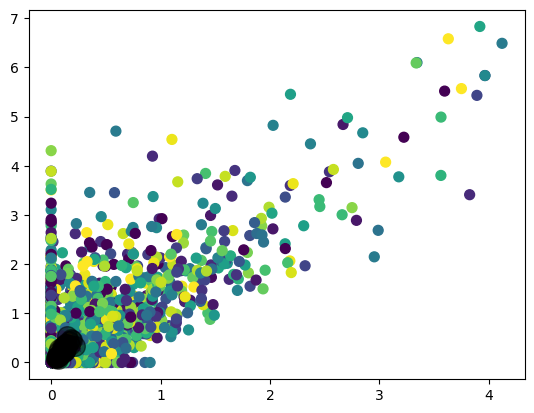

In [13]:
# plot the clusters
plt.scatter(features[:, 0], features[:, 1], c=cluster_labels_train, s=50, cmap='viridis')
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [3]:
val_dataset = torch.load('./preprocessed-data/val_dataset.pth')

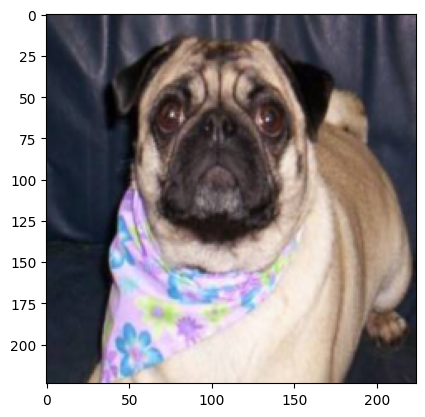

val_dataset[0][1] 27


In [7]:
plt.imshow(val_dataset[0][0].permute(1, 2, 0))
plt.show()
print("val_dataset[0][1]", val_dataset[0][1])

In [8]:
print("val dataset length", len(val_dataset))
print("val dataset classes", val_dataset.dataset.classes)

val dataset length 1478
val dataset classes ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British', 'Egyptian', 'Maine', 'Persian', 'Ragdoll', 'Russian', 'Siamese', 'Sphynx', 'american', 'basset', 'beagle', 'boxer', 'chihuahua', 'english', 'german', 'great', 'havanese', 'japanese', 'keeshond', 'leonberger', 'miniature', 'newfoundland', 'pomeranian', 'pug', 'saint', 'samoyed', 'scottish', 'shiba', 'staffordshire', 'wheaten', 'yorkshire']


In [18]:
Abyssinian_data = []
Bengal = []
Birman = []

yorkshire = []
wheaten = []
staffordshire = []
for i in range(len(val_dataset)):
    if val_dataset[i][1] == 0:
        Abyssinian_data.append(val_dataset[i][0])
    elif val_dataset[i][1] == 1:
        Bengal.append(val_dataset[i][0])
    elif val_dataset[i][1] == 2:
        Birman.append(val_dataset[i][0])
    elif val_dataset[i][1] == 34:
        yorkshire.append(val_dataset[i][0])
    elif val_dataset[i][1] == 33:
        wheaten.append(val_dataset[i][0])
    elif val_dataset[i][1] == 32:
        staffordshire.append(val_dataset[i][0])


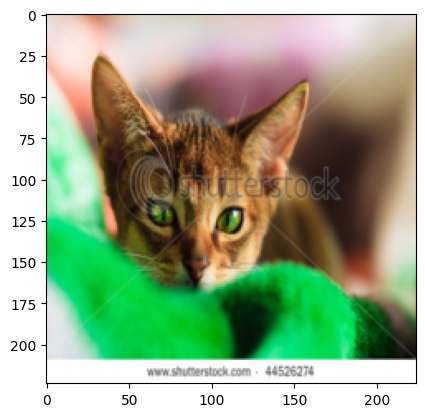

In [5]:
plt.imshow(Abyssinian_data[0].permute(1, 2, 0))
plt.show()

In [22]:
Abyssinian_data[0].shape

torch.Size([3, 224, 224])

In [11]:
image_features_1 = get_image_features(Abyssinian_data[0])

(512, 7, 7)
(1280, 7, 7)
(1024,)


d:\last sem\Computer Vision\DeepLearning_ComputerVision\main.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_image, dtype=torch.float32).unsqueeze(
c:\Python310\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [6]:
image_features_1.shape

(88832,)

In [7]:
centers = kmeans_model.cluster_centers_
print("centers.shape", centers.shape)

centers.shape (35, 88832)


In [13]:
similarity_scores = cosine_similarity(image_features_1.reshape(1, -1), centers)

# get the cluster label
cluster_label = np.argmax(similarity_scores)
print("cluster_label", cluster_label)

cluster_label 18


In [14]:
len(Abyssinian_data)

47

In [ ]:
cluster_labels = []
for image in Abyssinian_data:
    image_features = get_image_features(image)
    similarity_scores = cosine_similarity(image_features.reshape(1, -1), centers)
    cluster_label = np.argmax(similarity_scores)
    cluster_labels.append(cluster_label)

In [17]:
# the count of each cluster label
unique, counts = np.unique(cluster_labels, return_counts=True)
print("unique", unique)
print("counts", counts)

unique [ 1  9 11 12 13 17 18 24 27]
counts [ 6  1  1 17  1 11  5  1  4]


In [26]:
def get_cluster_labels(data, method="cosine_similarity"):
    cluster_labels = []
    for image in data:
        image_features = get_image_features(image)
        if(method == "cosine_similarity"):
            similarity_scores = cosine_similarity(image_features.reshape(1, -1), centers)
            cluster_label = np.argmax(similarity_scores)
            cluster_labels.append(cluster_label)
        if(method == "euclidean_distance"):
            distances = np.linalg.norm(centers - image_features, axis=1)
            cluster_label = np.argmin(distances)
            cluster_labels.append(cluster_label)
    return cluster_labels

In [ ]:
cluster_labels_dict = {'yorkshire': [], 'wheaten': [], 'staffordshire': [], 'Bengal': [], 'Birman': []}

cluster_labels_dict['yorkshire'] = get_cluster_labels(yorkshire)
cluster_labels_dict['wheaten'] = get_cluster_labels(wheaten)
cluster_labels_dict['staffordshire'] = get_cluster_labels(staffordshire)
cluster_labels_dict['Bengal'] = get_cluster_labels(Bengal)
cluster_labels_dict['Birman'] = get_cluster_labels(Birman)

In [24]:
for key in cluster_labels_dict:
    unique, counts = np.unique(cluster_labels_dict[key], return_counts=True)
    print(key)
    print("unique", unique)
    print("counts", counts)

yorkshire
unique [23 24 25]
counts [ 2  1 38]
wheaten
unique [ 0 11 23 24 25]
counts [ 9  2 10  1 22]
staffordshire
unique [ 9 11 19 21 24 28 30]
counts [ 3  2  1  4 22  7  1]
Bengal
unique [ 1 11 12 17 18 27]
counts [ 3 12  7 16  1  1]
Birman
unique [ 1 11 12 17 18 20 34]
counts [16  1  8 13  4  3  1]


In [ ]:
cluster_labels_dict = {'yorkshire': [], 'wheaten': [], 'staffordshire': [], 'Bengal': [], 'Birman': []}

cluster_labels_dict['yorkshire'] = get_cluster_labels(yorkshire, method="euclidean_distance")
cluster_labels_dict['wheaten'] = get_cluster_labels(wheaten, method="euclidean_distance")
cluster_labels_dict['staffordshire'] = get_cluster_labels(staffordshire, method="euclidean_distance")
cluster_labels_dict['Bengal'] = get_cluster_labels(Bengal, method="euclidean_distance")
cluster_labels_dict['Birman'] = get_cluster_labels(Birman, method="euclidean_distance")

In [28]:
for key in cluster_labels_dict:
    unique, counts = np.unique(cluster_labels_dict[key], return_counts=True)
    print(key)
    print("unique", unique)
    print("counts", counts)

yorkshire
unique [11 23 24 25]
counts [ 1  1  1 38]
wheaten
unique [ 0 11 23 24 25]
counts [11  2  9  1 21]
staffordshire
unique [ 9 11 21 24 28 30]
counts [ 1  8  4 19  7  1]
Bengal
unique [ 1 11 12 17 27]
counts [ 4 13  6 16  1]
Birman
unique [ 1 11 12 17 20 34]
counts [17  3  8 14  3  1]
